In [5]:
import pandas as pd
df = pd.read_csv('C:/Users/ktang28/SandboxProj_DiamondsPredictor/diamonds.csv')

# regressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

encoder = LabelEncoder()
df['cut'] = encoder.fit_transform(df['cut'])
df['color'] = encoder.fit_transform(df['color'])
df['clarity'] = encoder.fit_transform(df['clarity'])
    
X = df.drop('price', axis=1)
y = df['price']

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

X_train, X_test, y_train,y_test = train_test_split(X_normalized, y, test_size = 0.2)
X_validate, X_test, y_validate,y_test = train_test_split(X_test, y_test, test_size = 0.5)

print(len(X_train), len(X_test),len(X_validate))

43152 5394 5394


In [7]:
# random forest regression

from sklearn.ensemble import RandomForestRegressor
model_RF = RandomForestRegressor(n_estimators=10, criterion='squared_error', random_state=42)
model_RF.fit(X_train, y_train)

y_RF__predict = model_RF.predict(X_test)

score = model_RF.score(X_test,y_test)
print(score)

0.9998849141335024


In [9]:
# desision tree

from sklearn.tree import DecisionTreeRegressor
model_DT = DecisionTreeRegressor(criterion='absolute_error')
model_DT.fit(X_train, y_train)

y_pred_DT = model_DT.predict(X_test)

score_DT = model_DT.score(X_test,y_test)
print(score_DT)

0.9997670483314522


In [11]:
# svc regression

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

# Predict and evaluate
y_pred = svr.predict(X_test)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R^2 score: {r2}")

R^2 score: 0.8390017503375772


In [17]:
# KNN
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors = 8).fit(X_train, y_train)
model.score(X_test, y_test)

0.9711240313385346

In [20]:
score = []
result = 0
best_score = 0
neibor_num = range(1,20)
for i in neibor_num:
    knn = KNeighborsRegressor(n_neighbors = i).fit(X_train, y_train)
    results = knn.score(X_test, y_test)
    score.append(round(results, 2))
    
    if results >best_score:
        best_score = results
        best_k = i
        bestmodel = knn
print(score)
print(best_k)

[0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97]
4


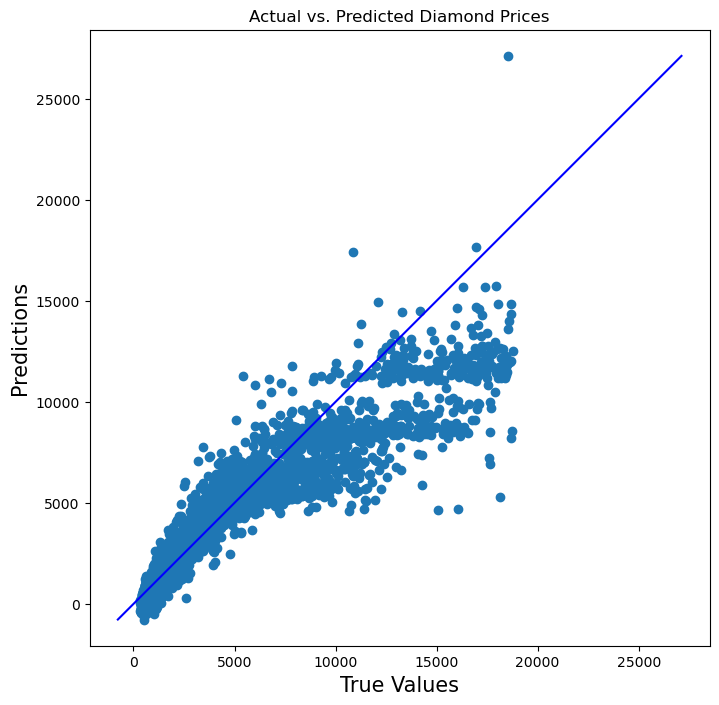

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred)
plt.title("Actual vs. Predicted Diamond Prices")

p1 = max(max(y_test), max(y_pred))
p2 = min(min(y_test), min(y_pred))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

plt.show()